<a href="https://colab.research.google.com/github/aswinmkv/Python_Portfolio/blob/main/Yulu_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv("bike_sharing.csv")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,12/19/2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,12/19/2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,12/19/2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,12/19/2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### Structure and characteristics of Data

In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe(include="all")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1/1/2011 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [ ]:
# to check the presence of null values
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
#1: spring, 2: summer, 3: fall, 4: winter
df["season"].unique()

array([1, 2, 3, 4])

In [ ]:
#1: Clear, Few clouds, partly cloudy, partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

df["weather"].unique()

array([1, 2, 3, 4])

In [ ]:
# converting specific datatypes to categorical
df["datetime"]=pd.to_datetime(df["datetime"])
categorical=["season","holiday","workingday","weather"]
for i in categorical:
  df[i]=df[i].astype("category")

#check for any duplicate values
df.duplicated().sum()

0

### Data Exploration

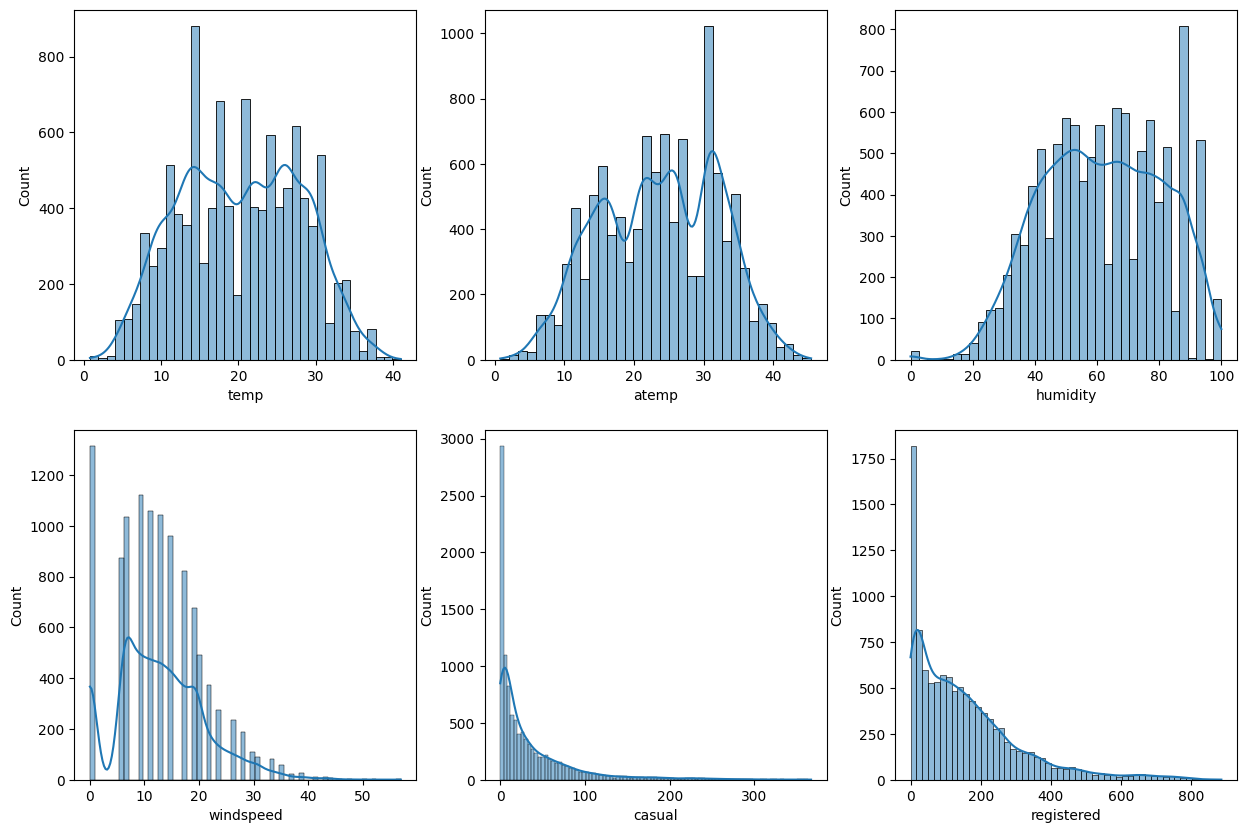

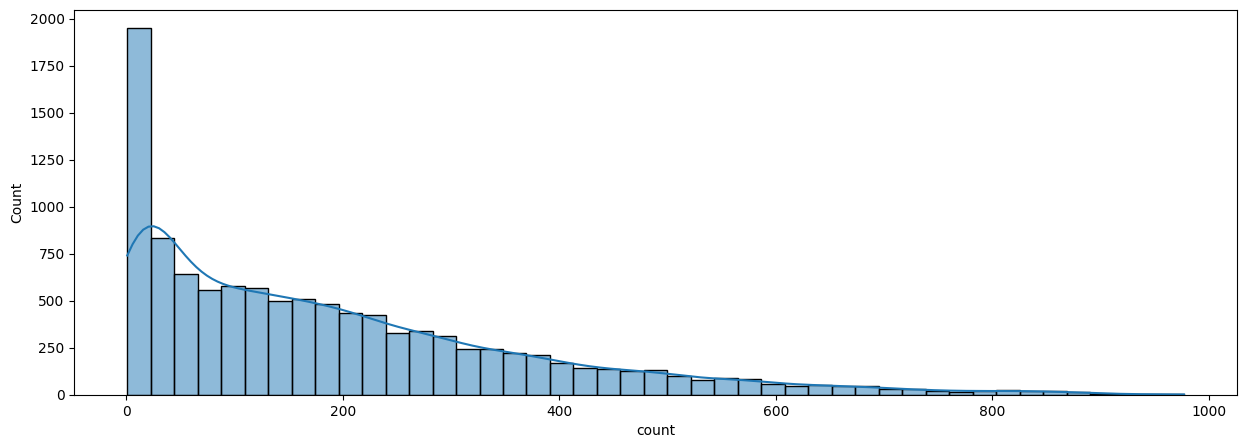

In [ ]:
columns_cat=['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig,axis=plt.subplots(nrows=2,ncols=3,figsize=(15,10))

index=0
for row in range(2):
  for col in range(3):
    sns.histplot(df[columns_cat[index]],ax=axis[row,col],kde=True)
    index += 1
plt.show()

fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(15,5))
sns.histplot(df[columns_cat[-1]], kde=True)
plt.show()

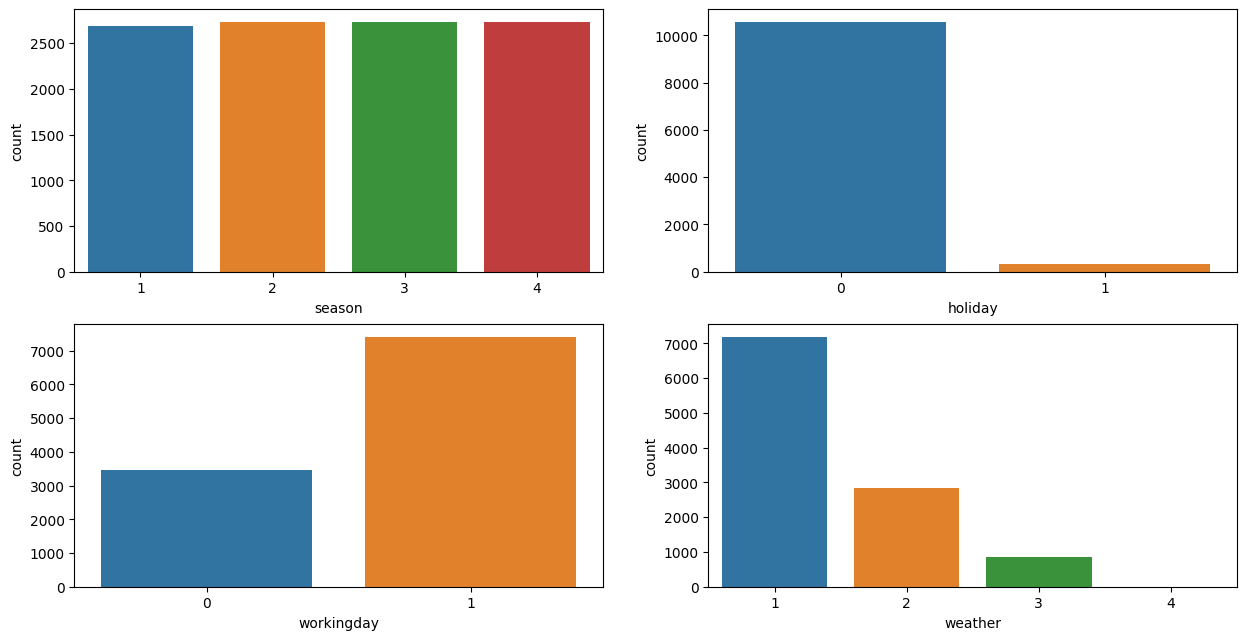

In [ ]:
cat=["season","holiday","workingday","weather"]
fig,axis=plt.subplots(nrows=2,ncols=2,figsize=(15,7.5))

index=0
for row in range(2):
  for col in range(2):
    sns.countplot(x=df[cat[index]],ax=axis[row,col])
    index +=1
plt.show()

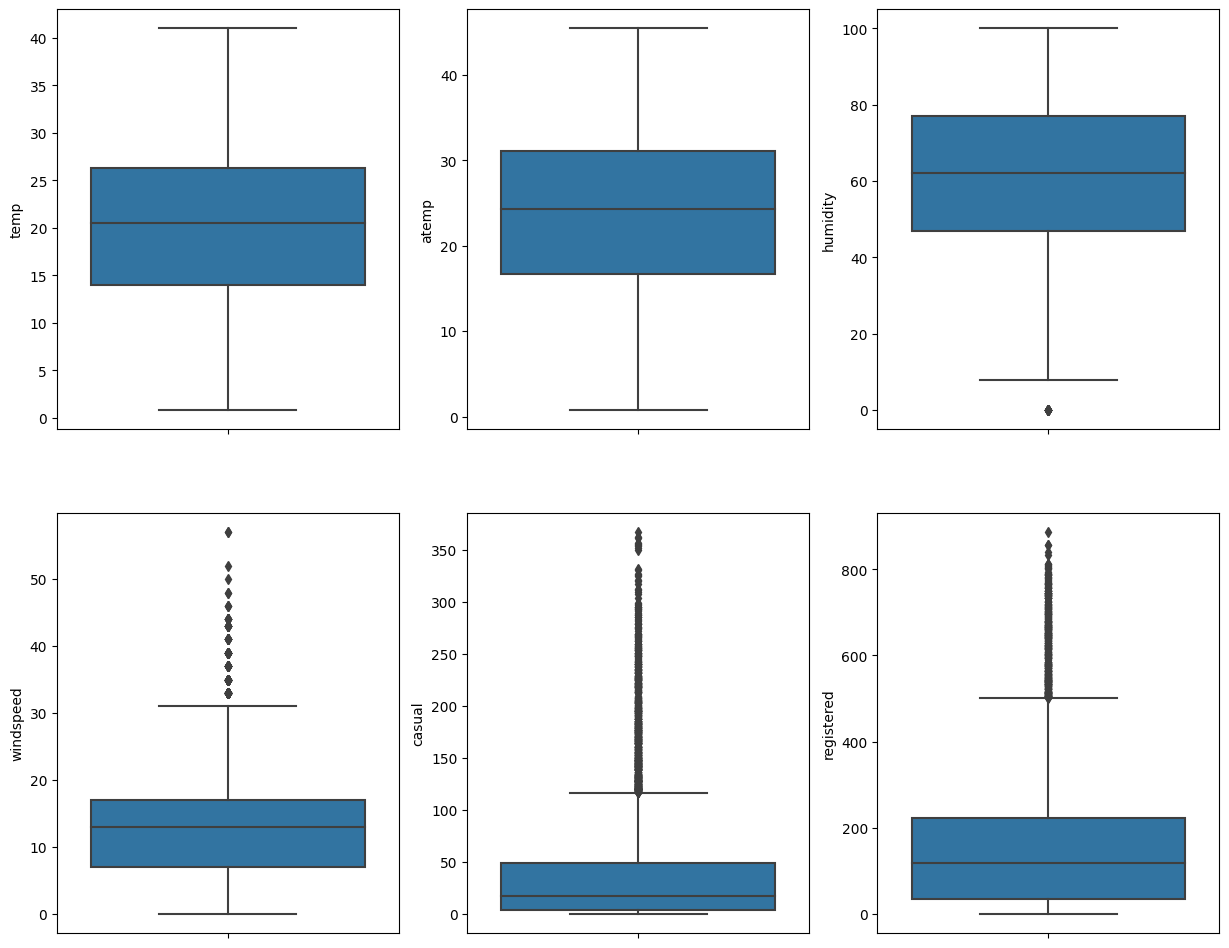

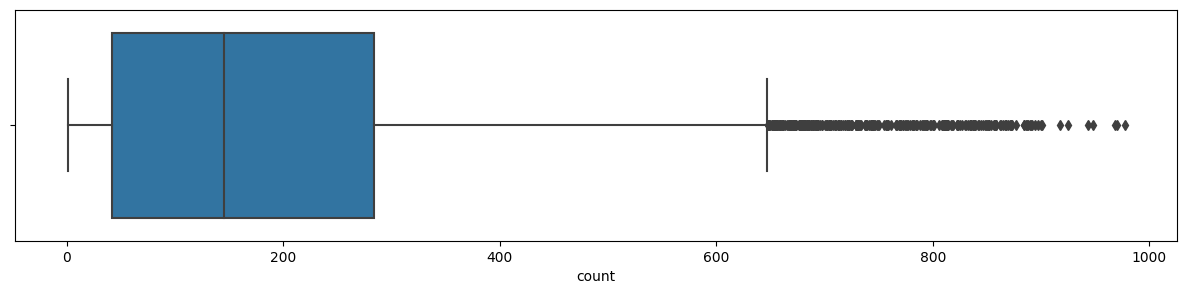

In [ ]:
columns_cat=['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig,axis=plt.subplots(nrows=2,ncols=3,figsize=(15,12))

index=0
for row in range(2):
  for col in range(3):
    sns.boxplot(y=df[columns_cat[index]],ax=axis[row,col])
    index += 1
plt.show()

fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(15,3))
sns.boxplot(x=df[columns_cat[-1]])
plt.show()

<ipython-input-13-6522c2b4e5f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


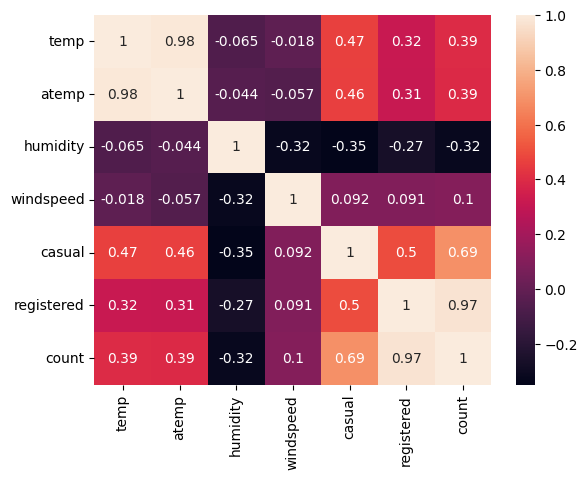

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
df["workingday"].value_counts(normalize=True)*100

1    68.087452
0    31.912548
Name: workingday, dtype: float64

In [ ]:
df["weather"].value_counts(normalize=True)*100

1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: weather, dtype: float64

In [ ]:
df["season"].value_counts(normalize=True)*100

4    25.114826
2    25.105640
3    25.105640
1    24.673893
Name: season, dtype: float64

In [ ]:
df_11=pd.crosstab(df["workingday"],df["weather"])
df_11

weather,1,2,3,4
workingday,,,,
0,2353,897,224,0
1,4839,1937,635,1


In [ ]:
df.groupby(["workingday"])[["casual","registered","count"]].sum()

,casual,registered,count
workingday,,,
0,206037,448835,654872
1,186098,1244506,1430604


In [ ]:
df.groupby(["weather"])[["casual","registered","count"]].sum()

,casual,registered,count
weather,,,
1,289900,1186163,1476063
2,87246,419914,507160
3,14983,87106,102089
4,6,158,164


In [ ]:
df.groupby(["season"])[["casual","registered","count"]].sum()

,casual,registered,count
season,,,
1,41605,270893,312498
2,129672,458610,588282
3,142718,497944,640662
4,78140,465894,544034


<Axes: xlabel='workingday', ylabel='count'>

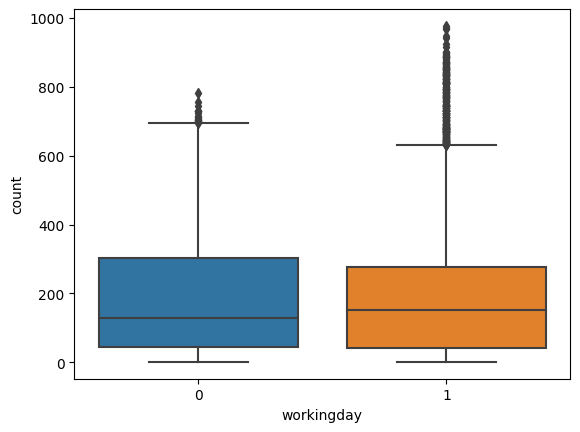

In [ ]:
sns.boxplot(data=df,x=df["workingday"],y=df["count"])

<Axes: xlabel='weather', ylabel='count'>

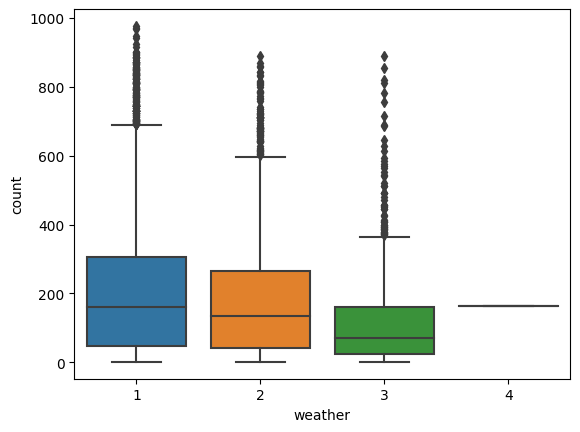

In [ ]:
sns.boxplot(data=df,x=df["weather"],y=df["count"])

<Axes: xlabel='season', ylabel='count'>

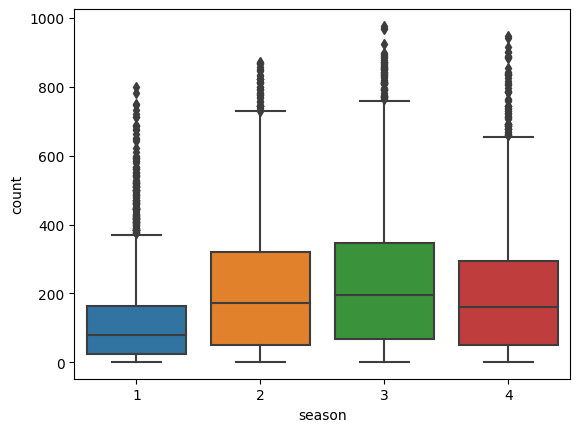

In [ ]:
sns.boxplot(data=df,x=df["season"],y=df["count"])

### Hypothesis testing 1

Ho : Working Day has no effect on bike rentals

Ha: Working day has effect on bike rentals

Since the data we work is numerical vs categorical, and how dependent each category(week day, weekend) on the rentals.

appropriate test - ttest_independent significance level alpha - 0.05

In [ ]:
from scipy.stats import ttest_ind
test1=df[df["workingday"]==1][["count"]]
test2=df[df["workingday"]==0][["count"]]

ttest,pvalue=ttest_ind(test1,test2,equal_var=False,alternative="greater")
alpha=0.05

print(alpha,ttest,pvalue)


if pvalue<alpha:
  print("Result : Reject null hypothesis, Working day has effect on bike rentals")
else:
  print("Result : Fail to reject null hypothesis, Working day has no effect on bike rentals")

0.05 [1.23625804] [0.10820156]
Result : Fail to reject null hypothesis, Working day has no effect on bike rentals


### Hypothesis testing 2

Ho : Weather has no effect on bike rentals

Ha: Weather has effect on bike rentals

Since the data we work is numerical vs >2 categorical, and how dependent rentals on each weather category

appropriate test - ANOVA

significance level alpha - 0.05

Since , it is anova test.the normality(shapiro,qqplot,kstest) and equal variances(levenes test) should be tested

In [ ]:
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
df_new=df[~(df["weather"]==4)]

In [ ]:
test_1=df_new[df_new["weather"]==1][["count"]]
test_2=df_new[df_new["weather"]==2][["count"]]
test_3=df_new[df_new["weather"]==3][["count"]]


In [ ]:
#for normality test , we are taking shapiros test
from scipy.stats import shapiro
sstat,pvalue=shapiro(df_new["count"].sample(4999))
print(pvalue)

if pvalue<0.05:
  print("its gaussian(normal distribution)")
else:
  print("Its not gaussian(not normally distributed)")


0.0
its gaussian(normal distribution)


In [ ]:
# normality test kstest
from scipy.stats import kstest
kstat,pvalue=kstest(test_1["count"],test_2["count"],test_3["count"])

print(pvalue)

if pvalue<0.05:
  print("its gaussian(normal distribution)")
else:
  print("Its not gaussian(not normally distributed)")


2.0232588507344455e-07
its gaussian(normal distribution)


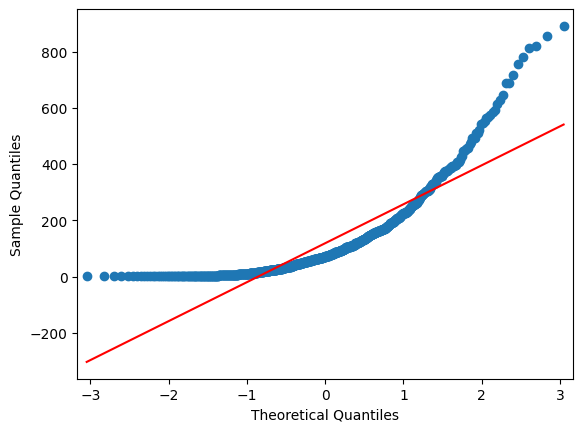

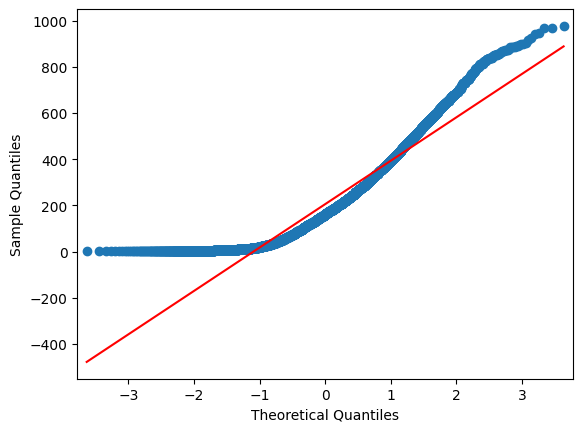

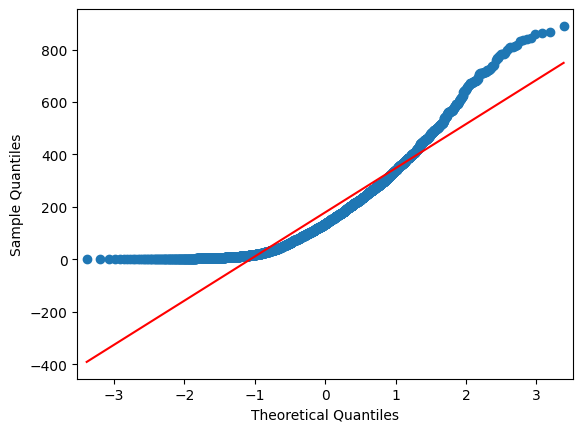

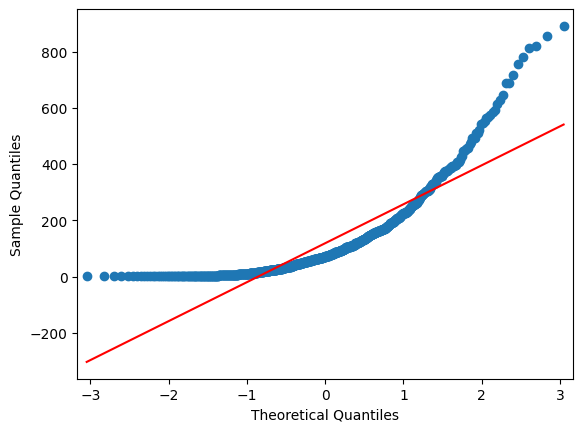

In [ ]:
#normality test qq plot, this output shows its not gaussian, since the percentile of sample is not
# intact with line of gaussian distribution
from statsmodels.graphics.gofplots import qqplot
qqplot(test_1["count"],line="s")
qqplot(test_2["count"],line="s")
qqplot(test_3["count"],line="s")

In [ ]:
#equal variance test - Levenes test
#ho:variance is equal
#ha:variance is not equal
from scipy.stats import levene

lstat,pvalue=levene(test_1["count"],test_2["count"],test_3["count"])

print(pvalue)

if pvalue<0.05:
  print("reject Ho,variance is not equal ")
else:
  print("fail to reject Ho,variance is equal ")


6.198278710731511e-36
reject Ho,variance is not equal 


In [ ]:
from scipy.stats import f_oneway


ftest,pvalue=f_oneway(test_1,test_2,test_3)
alpha=0.05

print(alpha,ftest,pvalue)

if pvalue<alpha:
  print("Result : Reject null hypothesis, Weather has effect on bike rentals")
else:
  print("Result : Fail to reject null hypothesis, Weather has no effect on bike rentals")

0.05 [98.28356882] [4.97644851e-43]
Result : Reject null hypothesis, Weather has effect on bike rentals


### Hypothesis Testing 3

Ho : Season has no effect on bike rentals

Ha: Season has effect on bike rentals

Since the data we work is numerical vs >2 categorical, and how dependent rentals on each weather category

appropriate test - ANOVA

significance level alpha - 0.05

Since , it is anova test.the normality(shapiro,qqplot,kstest) and equal variances(levenes test) should be tested


In [ ]:
df_new.season.value_counts()

4    2734
2    2733
3    2733
1    2685
Name: season, dtype: int64

In [ ]:
s1=df_new[df_new["season"]==1][["count"]]
s2=df_new[df_new["season"]==2][["count"]]
s3=df_new[df_new["season"]==3][["count"]]
s4=df_new[df_new["season"]==4][["count"]]

In [ ]:
#for normality test , we are taking shapiros test
from scipy.stats import shapiro
sstat,pvalue=shapiro(df_new["count"].sample(4999))
print(pvalue)

if pvalue<0.05:
  print("its gaussian(normal distribution)")
else:
  print("Its not gaussian(not normally distributed)")

0.0
its gaussian(normal distribution)


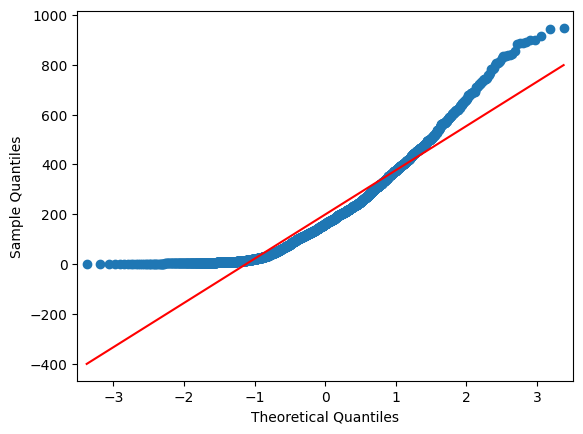

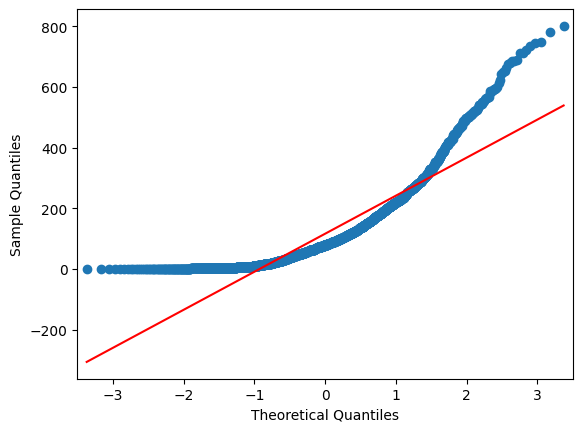

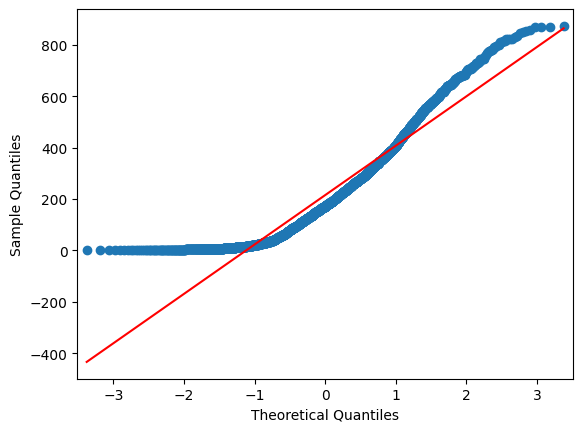

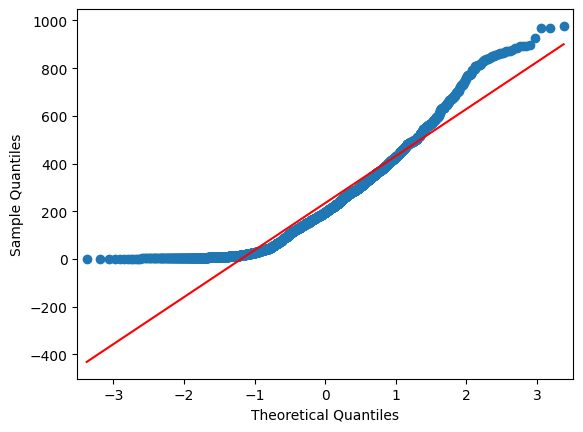

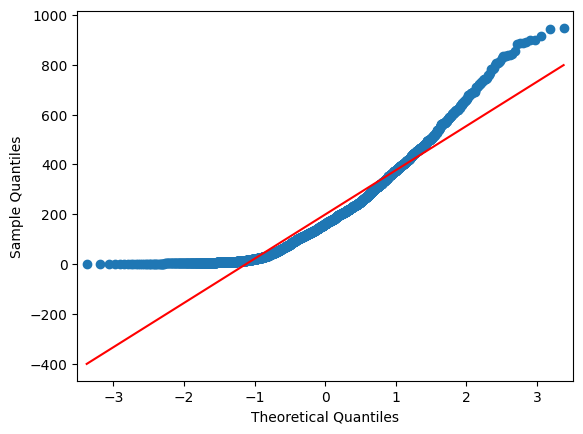

In [ ]:
# (normality test qq plot, this output shows its not gaussian, since the percentile of sample is not,
# intact with line of gaussian distribution)
from statsmodels.graphics.gofplots import qqplot
qqplot(s1["count"],line="s")
qqplot(s2["count"],line="s")
qqplot(s3["count"],line="s")
qqplot(s4["count"],line="s")

In [ ]:
# normality test kstest
from scipy.stats import kstest
kstat,pvalue=kstest(s1["count"],s2["count"],s3["count"],s4["count"])

print(pvalue)

if pvalue<0.05:
  print("its gaussian(normal distribution)")
else:
  print("Its not gaussian(not normally distributed)")


3.604075062604066e-90
its gaussian(normal distribution)


In [ ]:
#equal variance test - Levenes test
#ho:variance is equal
#ha:variance is not equal
from scipy.stats import levene

lstat,pvalue=levene(s1["count"],s2["count"],s3["count"],s4["count"])

print(pvalue)

if pvalue<0.05:
  print("reject Ho,variance is not equal ")
else:
  print("fail to reject Ho,variance is equal ")

1.1170990373788981e-118
reject Ho,variance is not equal 


In [ ]:
from scipy.stats import f_oneway


ftest,pvalue=f_oneway(s1,s2,s3,s4)
alpha=0.05

print(alpha,ftest,pvalue)

if pvalue<alpha:
  print("Result : Reject null hypothesis, Season has effect on bike rentals")
else:
  print("Result : Fail to reject null hypothesis, Season has no effect on bike rentals")

0.05 [236.94289499] [6.20406947e-149]
Result : Reject null hypothesis, Season has effect on bike rentals


### Hypothesis Testing 4

**Ho : Weather has no effect on seasons**

**Ha: Weather has effect on seasons **

Since the data we work is categorical vs categorical, and how dependent rentals on each weather category

appropriate test - **Chi-square test**

significance level alpha - **0.05**


In [ ]:
df_f= df_new[["season","weather","count"]]
df1=pd.crosstab(index=df_f["season"],columns=df_f["weather"],values=df_f["count"],aggfunc = 'mean').reset_index(drop=True)
df1

weather,1,2,3
0,126.781694,106.861538,61.227488
1,236.729595,189.515537,123.906250
2,243.583420,230.771523,156.582915
3,209.511163,194.784387,134.466667


In [ ]:
from scipy.stats import chi2_contingency

Xistat,p_value,dof,exp_freq=chi2_contingency(df1)

print(p_value)
alpha=0.05

if pvalue<alpha:
  print("Result : Reject null hypothesis, Weather has effect on seasons")
else:
  print("Result : Fail to reject null hypothesis, Weather has no effect on seasons")

0.5782339876834344
Result : Reject null hypothesis, Weather has effect on seasons


### Summary


* Its observed that whenever there is Clear, Few clouds, partly cloudy the bike rental is more in comparison to other weather conditions.71 % of rentals happened during Clear, Few clouds, partly cloudy weather.
* Registered users of rental bikes contribute more in comparison to the casual users
* Based on hypothesis testing,weather and season do have effects on the bike rentals

### Recommendations

* Since the season has effect on rentals, company must have high stock in rentals to cater the demand during the seasonal time in comparison to the other off season times
* Since the registered users are highest contributors, this show positive sign of the service provided by the company and must continue maintaining the levels during the highest demand spike seasons too
* Based on the weather conditions,rentals happens mostly during the clearsky and in other conditions can take bikes for maintanence based on pareto principle